In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
leaf_folder = 'leaf_test/'

In [4]:
import os 
classes = []
for i in os.listdir(leaf_folder):
    classes.append(i)

In [5]:
print(classes)

['Acer_Campestre', 'Alnus_Sieboldiana', 'Cotinus_Coggygria', 'Eucalyptus_Glaucescens', 'Ginkgo_Biloba', 'Liriodendron_Tulipifera', 'Prunus_X_Shmittii', 'Quercus_Phellos', 'Quercus_x_Hispanica', 'Zelkova_Serrata']


In [6]:
leaf_folder_path = pathlib.Path(leaf_folder)
images = list(leaf_folder_path.glob('*/*'))
len(images)
image_size = (550,475)

In [7]:
train_ds = image_dataset_from_directory(
    leaf_folder_path,
    validation_split=0.2,
    batch_size = 100,
    subset = 'training', 
    label_mode = 'categorical',
    image_size=image_size,
    class_names =classes,
    seed = 12
)

Found 160 files belonging to 10 classes.
Using 128 files for training.


In [8]:
for images,labels in train_ds.take(1):
    first_set=images
    print(type(images))
first_set.shape

<class 'tensorflow.python.framework.ops.EagerTensor'>


TensorShape([100, 550, 475, 3])

In [9]:
val_ds = image_dataset_from_directory(
    leaf_folder_path,
    validation_split=0.2,
    subset="validation",
    label_mode = 'categorical',
    image_size=image_size,
    batch_size=100,
    class_names=classes,
    seed = 12
)

Found 160 files belonging to 10 classes.
Using 32 files for validation.


In [10]:
# this works well so far
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(550,475,3)),
    layers.experimental.preprocessing.RandomFlip('vertical',input_shape=(550,475,3))
])
,    
  #  layers.experimental.preprocessing.RandomRotation(0.4)3

''

In [12]:
model=Sequential([
     data_augmentation,
     layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4), 
     layers.Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4),
     layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4),
     layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4),
     layers.Flatten(),
     layers.Dense(units=40,activation='relu'),
     layers.Dense(units=len(classes),activation='softmax')
])

#     layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
 #    layers.MaxPool2D(pool_size=(2,2)),
 #    layers.Dropout(0.4),

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 550, 475, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 546, 471, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 273, 235, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 273, 235, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 273, 235, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 136, 117, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 136, 117, 32)     

In [14]:
# set batch size and epochs
batch_size = 100
epochs = 200

In [15]:
#keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.001)

In [16]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds,)

Epoch 1/200
2/2 [==============================] - 37s 9s/step - loss: 323.5263 - accuracy: 0.0859 - val_loss: 14.6910 - val_accuracy: 0.0938
Epoch 2/200
2/2 [==============================] - 41s 9s/step - loss: 126.8021 - accuracy: 0.0781 - val_loss: 3.4452 - val_accuracy: 0.0938
Epoch 3/200
2/2 [==============================] - 39s 9s/step - loss: 15.4356 - accuracy: 0.1328 - val_loss: 2.3789 - val_accuracy: 0.1250
Epoch 4/200
2/2 [==============================] - 35s 9s/step - loss: 5.5537 - accuracy: 0.0859 - val_loss: 2.3015 - val_accuracy: 0.1875
Epoch 5/200
2/2 [==============================] - 36s 9s/step - loss: 2.6816 - accuracy: 0.1172 - val_loss: 2.2988 - val_accuracy: 0.0938
Epoch 6/200
2/2 [==============================] - 35s 9s/step - loss: 2.2676 - accuracy: 0.1094 - val_loss: 2.3056 - val_accuracy: 0.0625
Epoch 7/200
2/2 [==============================] - 37s 9s/step - loss: 2.2384 - accuracy: 0.1406 - val_loss: 2.3052 - val_accuracy: 0.0625
Epoch 8/200
2/2 [====

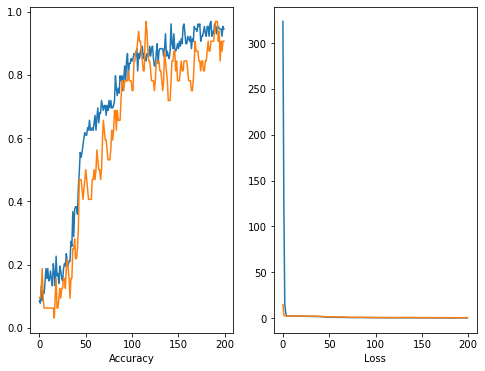

In [17]:
## Plot performance
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('Loss')

plt.show()